# US Flight Delay Analysis MVP
This notebook contains the analysis of the "On-Time : Reporting Carrier On-Time Performance" dataset, for January 2015.
In terms of technology, we will use pandas for the data manipulation and analysis.

Each phase of the process followed is indicated by cronological order.

## Imports:

In [1]:
import pandas as pd
import numpy as np
import os

# 01 - Data Preparation

## Data Loading

I use the os module, in order to get the directory of this notebook, and be totally sure of the data path to insert.

In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\GerardEspejo\\Desktop\\TFM\\TFM'

The dataset is loaded from a local folder "Data", which contains all the used datasets.

In [3]:
df_original = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Jan_2015.csv')
df_original.head()

C:\Users\GerardEspejo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2015,1,1,2,5,2015-01-02,NK,20416,NK,N521NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,3,6,2015-01-03,NK,20416,NK,N512NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,7,2015-01-04,NK,20416,NK,N528NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,5,1,2015-01-05,NK,20416,NK,N523NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,6,2,2015-01-06,NK,20416,NK,N534NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Examination
In this section, I am trying to have quick glance of the orginal dataset. The examination is focused on the size and data types.

In [4]:
df_original.shape

(469968, 110)

In [5]:
df_original.dtypes

YEAR                       int64
QUARTER                    int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS            int64
DEST_STATE_NM             object
DEST_WAC                   int64
CRS_DEP_TIME               int64
          

In [6]:
df_original.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 109'],
      dtype='object', length=110)

#### Conclusions
It appears that with the full dataset, we have 110 columns, and some with mixed types. In order to have a more flexible working environment, and because I won't be using all the data available, I will do a pre-filter of the columns needed once generating the dataset. This will help me reduce time and efforts. Therefore, I am creating a more specific dataset to work with. 

The selection of "interesting" columns is done during the data downloading process, in the BTS website: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

The new dataset won't have information (columns) related to: Gate Return Information at Origin Airport and Diverted Airport Information. Because we are focusing this analysis only on Flight Delays, I won't be using flight divertions informations, for now.

### Loading the new dataset 

In [7]:
df = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Jan_2015_v2.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2015,1,1,22,4,2015-01-22,DL,DL,N969DL,1485,...,134.0,1.0,950.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,22,4,2015-01-22,DL,DL,N912DL,1486,...,90.0,1.0,762.0,4,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,22,4,2015-01-22,DL,DL,N359NW,1487,...,240.0,1.0,1956.0,8,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,22,4,2015-01-22,DL,DL,N957AT,1488,...,29.0,1.0,143.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,22,4,2015-01-22,DL,DL,N985DL,1489,...,123.0,1.0,689.0,3,NaN,NaN,NaN,NaN,NaN,NaN


### Data Examination

In [8]:
df.shape

(469968, 51)

In [9]:
df.dtypes

YEAR                       int64
QUARTER                    int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
OP_UNIQUE_CARRIER         object
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_NM             object
DEST_WAC                   int64
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
DEP_DEL15                float64
DEP_DELAY_GROUP          float64
CRS_ARR_TI

#### Conclusions

It appears we have reduced the number of columns by 59, and we have solved the issue of having mixed types in various columns. In result, we now have a more "user-friendly" dataset.

## Trimming the Data

### Columns Rename
In order to maximize the user friendliness of the dataset, I choose to rename the columns to a more suitable name.

I will use the rename pandas fuction.

In [10]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 50'],
      dtype='object')

In [11]:
df.rename(columns={'YEAR':'Year',
                  'QUARTER':'Quarter',
                  'MONTH':'Month',
                  'DAY_OF_MONTH':'DayOfMonth',
                  'DAY_OF_WEEK':'DayOfWeek',
                  'FL_DATE':'FlightDate',
                  'OP_UNIQUE_CARRIER':'UniqueCarrier',
                  'OP_CARRIER':'Carrier',
                  'TAIL_NUM':'RegistrationNum',
                  'OP_CARRIER_FL_NUM':'FlightNum'}
          , inplace=True)

I use the iloc indexer to create little datasets, with selected columns. In that way, I am investigating the content and parameters of specific columns, and I can provide and ideal name. The philosophy is to use a name that will provide minimum valuable information.

In [12]:
#Origin related columns
df_org = df.iloc[:,[11,12,13,14,15,16,17]]
df_org.head()

,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID
0,31703,LGA,"New York, NY",NY,New York,22,13204
1,30397,ATL,"Atlanta, GA",GA,Georgia,34,12953
2,33570,SAN,"San Diego, CA",CA,California,91,11433
3,30397,ATL,"Atlanta, GA",GA,Georgia,34,10208
4,30397,ATL,"Atlanta, GA",GA,Georgia,34,12266


In [13]:
df.rename(columns={'ORIGIN_AIRPORT_ID':'OriginAirport_IDNum', 
                  'ORIGIN_CITY_MARKET_ID':'OriginCityMarket_IDNum', 
                  'ORIGIN':'Origin_IATA',
                  'ORIGIN_CITY_NAME':'OriginCityName',
                  'ORIGIN_STATE_ABR':'OriginState_ID',
                  'ORIGIN_STATE_NM':'OriginStateName',
                  'ORIGIN_WAC':'OriginWAC'}
          , inplace=True)

In [14]:
#Destination related columns
df_dest = df.iloc[:,[17,18,19,20,21,22,23]]
df_dest.head()

,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_WAC
0,13204,31454,MCO,"Orlando, FL",FL,Florida,33
1,12953,31703,LGA,"New York, NY",NY,New York,22
2,11433,31295,DTW,"Detroit, MI",MI,Michigan,43
3,10208,30208,AGS,"Augusta, GA",GA,Georgia,34
4,12266,31453,IAH,"Houston, TX",TX,Texas,74


In [15]:
df.rename(columns={'DEST_AIRPORT_ID':'DestAirport_IDNum',
                  'DEST_CITY_MARKET_ID':'DestCityMarket_IDNum',
                  'DEST':'Dest_IATA',
                  'DEST_CITY_NAME':'DestCityName',
                  'DEST_STATE_ABR':'DestState_ID',
                  'DEST_STATE_NM':'DestStateName',
                  'DEST_WAC':'DestWAC'}
          , inplace=True)

In [16]:
#Delay related columns
df_delay = df.iloc[:,[26,27,28,29,31,32,33,34]]
df_delay.head()

,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15
0,-5.0,0.0,0.0,-1.0,8.0,14.0,14.0,0.0
1,26.0,26.0,1.0,1.0,1456.0,-3.0,0.0,0.0
2,-6.0,0.0,0.0,-1.0,1907.0,-7.0,0.0,0.0
3,-1.0,0.0,0.0,-1.0,1954.0,-7.0,0.0,0.0
4,-8.0,0.0,0.0,-1.0,1454.0,-7.0,0.0,0.0


In [17]:
df.rename(columns={'CRS_DEP_TIME':'CRSDepTime',
                  'DEP_TIME':'DepTime',
                  'DEP_DELAY':'DepDelayMin',
                  'DEP_DELAY_NEW':'DepDelayMin0',
                  'DEP_DEL15':'DepDelay_Ind15',
                  'DEP_DELAY_GROUP':'DepDelayGroup_Int15',
                  'CRS_ARR_TIME':'CRSArrTime',
                  'ARR_TIME':'ArrTime',
                  'ARR_DELAY':'ArrDelayMin',
                  'ARR_DELAY_NEW':'ArrDelayMin0',
                  'ARR_DEL15':'ArrDelay_Ind15',
                  'ARR_DELAY_GROUP':'ArrDelayGroup_Int15'}
          , inplace=True)

In [18]:
#Cancellations related columns
df_delay = df.iloc[:,[36,37,38]]
df_delay.head()

,CANCELLED,CANCELLATION_CODE,DIVERTED
0,0.0,NaN,0.0
1,0.0,NaN,0.0
2,0.0,NaN,0.0
3,0.0,NaN,0.0
4,0.0,NaN,0.0


In [19]:
df.rename(columns={'CANCELLED':'Cancelled',
                  'CANCELLATION_CODE':'CancellationCode',
                  'DIVERTED':'Diverted',
                  'CRS_ELAPSED_TIME':'CRSElapsedTimeMin',
                  'ACTUAL_ELAPSED_TIME':'ActualElapsedTimeMin',
                  'AIR_TIME':'FlightTimeMin',
                  'FLIGHTS':'NumberOfFlights',
                  'DISTANCE':'DistanceMil',
                  'DISTANCE_GROUP':'Distance_Int250Mil',
                  'CARRIER_DELAY':'CarrierDelayMin',
                  'WEATHER_DELAY':'WeatherDelayMin',
                  'NAS_DELAY':'NASDelayMin',
                  'SECURITY_DELAY':'SecurityDelayMin',
                  'LATE_AIRCRAFT_DELAY':'LateAircraftDelay'}
          , inplace=True)

In [20]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'RegistrationNum', 'FlightNum',
       'OriginAirport_IDNum', 'OriginCityMarket_IDNum', 'Origin_IATA',
       'OriginCityName', 'OriginState_ID', 'OriginStateName', 'OriginWAC',
       'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTimeMin',
       'ActualElapsedTimeMin', 'FlightTimeMin', 'NumberOfFlights',
       'DistanceMil', 'Distance_Int250Mil', 'CarrierDelayMin',
       'WeatherDelayMin', 'NASDelayMin', 'SecurityDelayMin',
       'LateAircraftDelay', 'Unnamed: 50'],
      dtype='object')

### Changing Date Format: DepTime and ArrTime

In [21]:
df_time = df[['DepTime', 'ArrTime', 'FlightDate']]
df_time.sample(10)

,DepTime,ArrTime,FlightDate
318294,829.0,1012.0,2015-01-09
416244,1821.0,2009.0,2015-01-14
441284,740.0,859.0,2015-01-24
309799,1955.0,2207.0,2015-01-15
422032,1154.0,1315.0,2015-01-19
354867,635.0,903.0,2015-01-28
118533,1438.0,1731.0,2015-01-21
3272,953.0,1210.0,2015-01-23
147799,2037.0,2330.0,2015-01-28
174103,1358.0,1454.0,2015-01-08


In [22]:
df_time.dtypes

DepTime       float64
ArrTime       float64
FlightDate     object
dtype: object

As we can see, both DepTime and ArrTime are float types. Therefore, we will create a function that will enable us to parse our int hours into a reasonable format ("HH:MM").  

In [23]:
def Deptime_to_String(deptime):
   
    #Using 'int' we only keep the integer value of the division, which represents the hour
    #Applying '%' Modulus, results (hours) equals to '24' are avoided, and returned as '00'
    dephour = int(deptime / 100) % 24
    depmin = int(deptime % 100)

    return '%02d:%02d' % (dephour, depmin)

def Arrtime_to_String(arrtime):
    
    #Using 'int' we only keep the integer value of the division, which represents the hour
    #Applying '%' Modulus, results (hours) equals to '24' are avoided, and returned as '00'
    arrhour = int(arrtime / 100) % 24 
    arrmin = int(arrtime % 100)

    return '%02d:%02d' % (arrhour, arrmin)

In [24]:
#We test the functions created with the first flight of the previous sample
Deptime_to_String(2010.0), Arrtime_to_String(2153.0)

('20:10', '21:53')

In [25]:
#On previous tries I had this error - "ValueError: cannot convert float NaN to integer"
#Therefore, I chose to remove the missing values with dropna
deptime = df['DepTime'].dropna().apply(Deptime_to_String)
arrtime = df['ArrTime'].dropna().apply(Arrtime_to_String)

In [26]:
#Let's create 2 new columns with the time in the correct format
df['DepTime2'] = deptime
df['ArrTime2'] = arrtime

In [27]:
#Test
df['DepTime2'].sample()

417527    19:40
Name: DepTime2, dtype: object

In [28]:
#Test
df['ArrTime2'].sample()

376338    16:50
Name: ArrTime2, dtype: object

Now, we have two new columns: DepTime2 and ArrTime2; containing departure and arrival times in the correct format. Next, we will generate a new column, for both times, into a TimeStamp format ('YYYY-MM-DD HH:MM:SS').

Applying 'to_datetime' we are able to combine two columns, for example: 'DepTime2' (Time) and 'FlightDate' (Date); and create a TimeStamp format with both of them, in a new column.

In [29]:
#Because to_datetime, the Date has to be positioned prior to the Time
dep_datetime = pd.to_datetime(df['FlightDate']+' '+df['DepTime2'])
df['DepDateTime'] = dep_datetime
df['DepDateTime'].sample(5) #Test

205559   2015-01-06 16:28:00
167368   2015-01-16 18:16:00
272103   2015-01-08 20:46:00
418181   2015-01-16 21:58:00
100216   2015-01-13 11:12:00
Name: DepDateTime, dtype: datetime64[ns]

In [30]:
arr_datetime = pd.to_datetime(df['FlightDate']+' '+df['ArrTime2'])
df['ArrDateTime'] = arr_datetime
df['ArrDateTime'].sample(5) #Test

168429   2015-01-24 20:10:00
177994   2015-01-30 08:58:00
415115   2015-01-16 21:02:00
26337    2015-01-12 14:24:00
386358   2015-01-07 16:00:00
Name: ArrDateTime, dtype: datetime64[ns]

After having created both columns, let's drop the redundant columns: DepTime, DepTime2, ArrTime, ArrTime2 and FlightDate.

In [31]:
df = df.drop(['DepTime', 'DepTime2', 'ArrTime', 'ArrTime2', 'FlightDate'], axis=1)

In [32]:
#Last check
df_time = df[['DepDateTime', 'ArrDateTime']]
df_time.head()

,DepDateTime,ArrDateTime
0,2015-01-22 20:45:00,2015-01-22 00:08:00
1,2015-01-22 13:11:00,2015-01-22 14:56:00
2,2015-01-22 11:44:00,2015-01-22 19:07:00
3,2015-01-22 19:08:00,2015-01-22 19:54:00
4,2015-01-22 13:34:00,2015-01-22 14:54:00


## Treating Null Values

Let's use the isna() method to indentify the null values per column, and the count them with sum().

In [33]:
df.isna().sum()

Year                           0
Quarter                        0
Month                          0
DayOfMonth                     0
DayOfWeek                      0
UniqueCarrier                  0
Carrier                        0
RegistrationNum             2782
FlightNum                      0
OriginAirport_IDNum            0
OriginCityMarket_IDNum         0
Origin_IATA                    0
OriginCityName                 0
OriginState_ID                 0
OriginStateName                0
OriginWAC                      0
DestAirport_IDNum              0
DestCityMarket_IDNum           0
Dest_IATA                      0
DestCityName                   0
DestState_ID                   0
DestStateName                  0
DestWAC                        0
CRSDepTime                     0
DepDelayMin                11657
DepDelayMin0               11657
DepDelay_Ind15             11657
DepDelayGroup_Int15        11657
CRSArrTime                     0
ArrDelayMin                12955
ArrDelayMi

It appears the 'CancellationCode' column has the highest number of null values with 457986. Followed by the Delay's causes: 'CarrierDelayMin', 'WeatherDelayMin, 'NASDelayMin', SecurityDelayMin', 'LateAircraftDelay'; with 374017 each. 

Let's keep it mind that the dataframe has 469968 values per column. Also, that the most interesting columns for us (the ones specically related to the delays in Departures and Arrivals); have between 11657 (Departures) and 12955 (Arrivals).

Therefore, we will drop the columns with more than 20.000 nulls values. This established threshold is only for the MVP version, on further investigations we will try a more optimal way of normalitzation. In dropna(), the threshold value indicates the minimum non-null values. Threshold = 469.968 - 20.000 = 449.968

In [34]:
df2 = df.dropna(axis=1, thresh=449968)
df2.shape

(469968, 43)

In [35]:
df.shape

(469968, 50)

We have dropped 7 columns

# 02 - Data Examination

In [36]:
import matplotlib.pyplot as plt

In [37]:
df2.columns

Index(['Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek', 'UniqueCarrier',
       'Carrier', 'RegistrationNum', 'FlightNum', 'OriginAirport_IDNum',
       'OriginCityMarket_IDNum', 'Origin_IATA', 'OriginCityName',
       'OriginState_ID', 'OriginStateName', 'OriginWAC', 'DestAirport_IDNum',
       'DestCityMarket_IDNum', 'Dest_IATA', 'DestCityName', 'DestState_ID',
       'DestStateName', 'DestWAC', 'CRSDepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrDelayMin',
       'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15', 'Cancelled',
       'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepDateTime', 'ArrDateTime'],
      dtype='object')

In [38]:
#Let's check the range of values in DepDelayMin and ArrDelayMin
df2[['DepDelayMin', 'ArrDelayMin']].describe()

,DepDelayMin,ArrDelayMin
count,458311.000000,457013.000000
mean,9.759471,5.813583
std,36.636491,39.413501
min,-48.000000,-82.000000
25%,-5.000000,-13.000000
50%,-2.000000,-4.000000
75%,9.000000,10.000000
max,1988.000000,1971.000000


In [39]:
df2.shape

(469968, 43)

In [40]:
#In column 'DepDelayMin', early departures show negative numbers
#Let's check how many early departures, or on-time, of the 469968 total flights, there are
df2[df2['DepDelayMin']<0].count()['DepDelayMin']

257399

In [41]:
#Let's check the range of values in 'DepDelayMin0' and 'ArrDelayMin0'
#'DepDelayMin0' and 'ArrDelayMin0', will set all the negative values (early departures) to 0
df2[['DepDelayMin', 'DepDelayMin0', 'ArrDelayMin', 'ArrDelayMin0']].describe()

,DepDelayMin,DepDelayMin0,ArrDelayMin,ArrDelayMin0
count,458311.000000,458311.000000,457013.000000,457013.000000
mean,9.759471,12.572550,5.813583,13.124150
std,36.636491,35.492214,39.413501,35.771842
min,-48.000000,0.000000,-82.000000,0.000000
25%,-5.000000,0.000000,-13.000000,0.000000
50%,-2.000000,0.000000,-4.000000,0.000000
75%,9.000000,9.000000,10.000000,10.000000
max,1988.000000,1988.000000,1971.000000,1971.000000


Looking for Delay Distribution

C:\Users\GerardEspejo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\GerardEspejo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


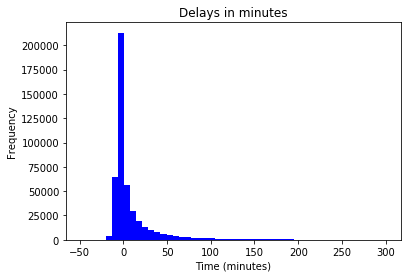

In [42]:
plt.hist(df2['DepDelayMin'], range=[min(df2['DepDelayMin']),300], bins=50,  color = 'blue')
plt.title('Delays in minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

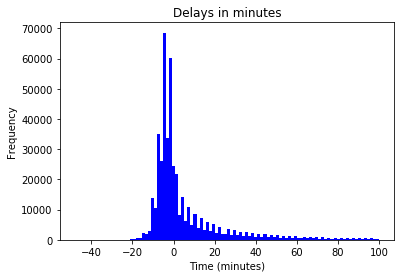

In [43]:
plt.hist(df2['DepDelayMin'], range=[min(df2['DepDelayMin']),100], bins=100,  color = 'blue')
plt.title('Delays in minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

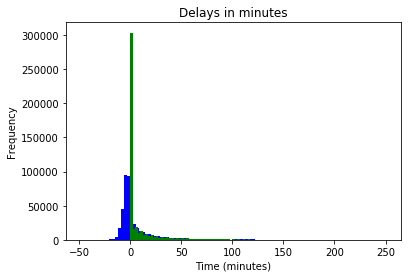

In [44]:
plt.hist(df2['DepDelayMin'], range=[min(df2['DepDelayMin']), 250], bins=100,  color = 'blue')
plt.hist(df2['DepDelayMin0'], range=[min(df2['DepDelayMin0']), 250], bins=100,  color = 'green')
plt.title('Delays in minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Let's see which are the most delayed airports:

In [45]:
#Departure Delays
airports_max_depdelay = df2.groupby('Origin_IATA')

In [108]:
#Top 10 airports, by average delay
airports_max_depdelay['DepDelayMin'].mean().sort_values(ascending=False).head(10)

Origin_IATA
DVL    35.627907
JMS    34.322581
IMT    32.381818
OTH    30.375000
CEC    28.881356
TTN    26.942982
SCE    26.492063
ILG    26.461538
APN    25.653061
ACV    25.088435
Name: DepDelayMin, dtype: float64

In [109]:
#Top 10 airports, by accumulative delay
airports_max_depdelay['DepDelayMin'].sum().sort_values(ascending=False).head(10)

Origin_IATA
ORD    447649.0
DFW    266358.0
DEN    261181.0
ATL    212578.0
SFO    130279.0
LAX    127823.0
IAH    120146.0
LGA    114585.0
PHX    105182.0
EWR    103527.0
Name: DepDelayMin, dtype: float64

In [110]:
#Let's see if the top 10 airports, per volume of flights. Will they be the same?
top10_deps = df2['Origin_IATA'].value_counts().sort_values(ascending = False).head(10)
top10_deps

ATL    29512
ORD    23484
DFW    23153
LAX    17340
DEN    17090
IAH    13376
PHX    13122
SFO    12891
LAS    11604
MCO    10083
Name: Origin_IATA, dtype: int64

In [54]:
#airports_max_depdelay['DepDelayMin'].mean().sort_values(ascending=False).head(10)

#### Conclusion - Hypothesis 1

There is a relation between the top 10 airports by number of flights, and the accumulated delays. But, it is really interesting because the top airports per volume of flights are not the top on the average delay list.

Let's see which are the most punctual/delayed airlines:
Will the most punctual airlines at Departures be the same as at arrival?

In [111]:
airlines = df2.groupby('Carrier')

In [112]:
#Most punctual airlines at Departure
#departure_best = airlines['DepDelayMin'].mean().sort_values(ascending=True).head(10)
#arrival_best = airlines['ArrDelayMin'].mean().sort_values(ascending=True).head(10)
#punctual_airlines = airlines['DepDelayMin','ArrDelayMin'].mean().sort_values(ascending=True).head(10)

In [148]:
#How many airlines do we have?
airlines['Carrier'].unique().count()

14

In [113]:
airlines['DepDelayMin'].mean().sort_values(ascending=True).head(10)

Carrier
HA     1.310065
AS     3.178209
US     5.197315
DL     5.904238
VX     6.910772
WN     9.514470
EV     9.752522
B6    10.035556
AA    10.593542
OO    12.155157
Name: DepDelayMin, dtype: float64

In [125]:
punctual_airlines = airlines['DepDelayMin','ArrDelayMin'].mean()\
    .sort_values(by=['DepDelayMin','ArrDelayMin'], ascending=True)
punctual_airlines.head(10)

,DepDelayMin,ArrDelayMin
Carrier,,
HA,1.310065,3.512640
AS,3.178209,-0.320888
US,5.197315,3.107457
DL,5.904238,-2.043847
VX,6.910772,1.420702
WN,9.514470,3.389466
EV,9.752522,8.537497
B6,10.035556,7.347281
AA,10.593542,6.955843


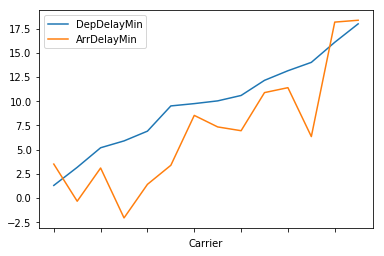

In [141]:
punctual_airlines.plot()

In [85]:
#Most punctual airlines at Arrival
airlines['ArrDelayMin'].mean().sort_values(ascending=True).head(10)

Carrier
DL   -2.043847
AS   -0.320888
VX    1.420702
US    3.107457
WN    3.389466
HA    3.512640
UA    6.352729
AA    6.955843
B6    7.347281
EV    8.537497
Name: ArrDelayMin, dtype: float64

In [116]:
#Most Delayed airlines
most_delayed_airlines = airlines['DepDelayMin','ArrDelayMin'].mean()\
    .sort_values(by=['DepDelayMin','ArrDelayMin'], ascending=False)
most_delayed_airlines.head(10)

,DepDelayMin,ArrDelayMin
Carrier,,
F9,17.984433,18.357238
MQ,16.081207,18.164974
UA,14.010359,6.352729
NK,13.146294,11.398054
OO,12.155157,10.889894
AA,10.593542,6.955843
B6,10.035556,7.347281
EV,9.752522,8.537497
WN,9.514470,3.389466


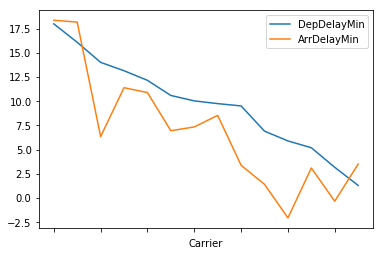

In [146]:
most_delayed_airlines.plot()

Let's see which are the most delayed Routes:

In [136]:
#Most Delayed Flights
flights_most_delayed = df2.groupby(['Carrier','FlightNum','Origin_IATA','Dest_IATA'])

In [58]:
airports_maxdelay_4 = df2.groupby('Origin_IATA')
airports_maxdelay_4['DepDelayMin'].mean().sort_values(ascending = False).head()

Origin_IATA
DVL    35.627907
JMS    34.322581
IMT    32.381818
OTH    30.375000
CEC    28.881356
Name: DepDelayMin, dtype: float64

In [51]:
airports_maxdelay_4['DepDelayMin'].sum().sort_values(ascending = False).head()

Origin_IATA
ORD    447649.0
DFW    266358.0
DEN    261181.0
ATL    212578.0
SFO    130279.0
Name: DepDelayMin, dtype: float64

In [77]:
df2['Origin_IATA'].value_counts().sort_values(ascending = False).head()

ATL    29512
ORD    23484
DFW    23153
LAX    17340
DEN    17090
Name: Origin_IATA, dtype: int64

In [58]:
df2.nsmallest(40, ['DepDelayMin'])['DepDelayMin']

265015   -48.0
165979   -47.0
162809   -42.0
163882   -42.0
254528   -42.0
251864   -41.0
162807   -40.0
312410   -40.0
161714   -39.0
266453   -39.0
315025   -38.0
165024   -37.0
289292   -37.0
289302   -37.0
289311   -36.0
164807   -35.0
166035   -35.0
289310   -35.0
164833   -34.0
64831    -33.0
251863   -33.0
251867   -33.0
251870   -33.0
289296   -33.0
78647    -32.0
163884   -32.0
257142   -32.0
279595   -32.0
26687    -31.0
85545    -31.0
253713   -31.0
160251   -30.0
161334   -30.0
27213    -29.0
87742    -29.0
135646   -29.0
159597   -29.0
170158   -29.0
171024   -29.0
97363    -28.0
Name: DepDelayMin, dtype: float64

In [52]:
df2.nsmallest(5, ['DepDelayMin'])

,Year,Quarter,Month,DayOfMonth,DayOfWeek,UniqueCarrier,Carrier,RegistrationNum,FlightNum,OriginAirport_IDNum,...,Cancelled,Diverted,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepDateTime,ArrDateTime
265015,2015,1,1,27,2,OO,OO,N443SW,4718,14696,...,0.0,0.0,109.0,129.0,73.0,1.0,411.0,2,2015-01-27 06:47:00,2015-01-27 07:56:00
165979,2015,1,1,18,7,AS,AS,N788AS,66,15991,...,0.0,0.0,55.0,51.0,38.0,1.0,199.0,1,2015-01-18 17:43:00,2015-01-18 18:34:00
162809,2015,1,1,9,5,AS,AS,N705AS,66,15991,...,0.0,0.0,49.0,51.0,36.0,1.0,199.0,1,2015-01-09 17:48:00,2015-01-09 18:39:00
163882,2015,1,1,13,2,AS,AS,N756AS,66,10926,...,0.0,0.0,48.0,58.0,35.0,1.0,213.0,1,2015-01-13 16:20:00,2015-01-13 17:18:00
254528,2015,1,1,18,7,OO,OO,N225AG,3499,14869,...,0.0,0.0,115.0,160.0,103.0,1.0,630.0,3,2015-01-18 07:18:00,2015-01-18 08:58:00


In [125]:
df.dtypes

Year                        int64
Quarter                     int64
Month                       int64
DayOfMonth                  int64
DayOfWeek                   int64
FlightDate                 object
UniqueCarrier              object
Carrier                    object
RegistrationNum            object
FlightNum                   int64
OriginAirport_IDNum         int64
OriginCityMarket_IDNum      int64
Origin_IATA                object
OriginCityName             object
OriginState_ID             object
OriginStateName            object
OriginWAC                   int64
DestAirport_IDNum           int64
DestCityMarket_IDNum        int64
Dest_IATA                  object
DestCityName               object
DestState_ID               object
DestStateName              object
DestWAC                     int64
CRSDepTime                  int64
DepTime                   float64
DepDelayMin               float64
DepDelayMin0              float64
DepDelay_Ind15            float64
DepDelayGroup_

In [126]:
df_flights_list = df[['YEAR', 'FL_DATE', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED']]
df_flights_list.head(10)

KeyError: "['YEAR' 'FL_DATE' 'ORIGIN_AIRPORT_ID' 'ORIGIN' 'DEST_AIRPORT_ID' 'DEST'\n 'DEP_DELAY' 'ARR_DELAY' 'CANCELLED'] not in index"

In [127]:
df_flights_list.corr

NameError: name 'df_flights_list' is not defined

In [128]:
max_delay_mins = df_flights_list[['DEP_DELAY']].max()
max_delay_hours = max_delay_mins/60
max_delay_hours

NameError: name 'df_flights_list' is not defined

In [129]:
df_flights_list.sort_values(by=['DEP_DELAY'])

NameError: name 'df_flights_list' is not defined

In [130]:
#Check Dataframe dimensions: number of rows
len(df)

469968

In [35]:
#NaN Treatment
df_clean = df.dropna()
df_clean.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 48


In [37]:
df_flights_list_clean = df_flights_list.dropna()
df_flights_list_clean.head()

,YEAR,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_DELAY,ARR_DELAY,CANCELLED
0,2018,2018-01-27,11697,FLL,12266,IAH,-13.0,-12.0,0.0
1,2018,2018-01-27,14747,SEA,14771,SFO,-4.0,-18.0,0.0
2,2018,2018-01-27,11278,DCA,12266,IAH,-2.0,1.0,0.0
3,2018,2018-01-27,12892,LAX,13930,ORD,-9.0,-8.0,0.0
4,2018,2018-01-27,12451,JAX,11618,EWR,-14.0,-24.0,0.0
